**Clustering**

Clustering (unsupervised Learning) adalah mengelompokkan pelanggan berdasarkan data pelanggan di dealer tanpa memperhatikan label kelas apakah pelanggan tertarik untuk membeli kendaraan baru atau tidak. 

In [1]:
# Import Library

import pandas as pd
import numpy as np

# Pengenalan Dataset

- SIM	--> 0 : Tidak punya SIM 1 : Punya SIM
- Kode_Daerah --> Kode area tempat tinggal pelanggan
- Sudah_Asuransi --> 1 : Pelanggan sudah memiliki asuransi kendaraan, 0 : Pelanggan belum memiliki asuransi kendaraan
- Umur_Kendaraan --> Umur kendaraan
- Kendaraan_Rusak --> 1 : Kendaraan pernah rusak sebelumnya. 0 : Kendaraan belum pernah rusak.
- Premi --> Jumlah premi yang harus dibayarkan per tahun.
- Kanal_Penjualan --> Kode kanal untuk menghubungi pelanggan (email, telpon, dll)
- Lama_Berlangganan	--> Sudah berapa lama pelanggan menjadi klien perusahaan
- Tertarik --> 1 : Pelanggan tertarik, 0 : Pelanggan tidak tertarik

Clustring tidak membutuhkan kolom 'Tertarik'

In [34]:
# Membaca file .csv

df = pd.read_csv("kendaraan_train.csv")

print("Data read into pandas dataframe!")

Data read into pandas dataframe!


In [35]:
df.drop(["Tertarik"], axis=1,  inplace=True) #Clustering tidak membutuhkan kolom 'Tertarik'

#Melakukan drop kolom berdasarkan analisis data
df.drop(["id"], axis=1,  inplace=True)
df.drop(["Jenis_Kelamin"], axis=1,  inplace=True)
df.drop(["SIM"], axis=1,  inplace=True)
df.drop(["Kode_Daerah"], axis=1,  inplace=True)
df.drop(["Umur_Kendaraan"], axis=1,  inplace=True)
df.drop(["Kendaraan_Rusak"], axis=1,  inplace=True)

# Data Cleaning <a id="0"></a>

In [36]:
# Melihat 5 data teratas dari dataset

df.head()

,Umur,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan
0,30.0,1.0,28029.0,152.0,97.0
1,48.0,0.0,25800.0,29.0,158.0
2,21.0,1.0,32733.0,160.0,119.0
3,58.0,0.0,2630.0,124.0,63.0
4,50.0,0.0,34857.0,88.0,194.0


In [37]:
# Melihat 5 data terbawah dari dataset

df.tail()

,Umur,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan
285826,23.0,1.0,25988.0,152.0,217.0
285827,21.0,1.0,44686.0,152.0,50.0
285828,23.0,1.0,49751.0,152.0,226.0
285829,68.0,1.0,30503.0,124.0,270.0
285830,45.0,0.0,36480.0,26.0,44.0


In [38]:
# Melihat ukuran dataset

df.shape

(285831, 5)

In [39]:
# Melihat jenis data dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Umur               271617 non-null  float64
 1   Sudah_Asuransi     271602 non-null  float64
 2   Premi              271262 non-null  float64
 3   Kanal_Penjualan    271532 non-null  float64
 4   Lama_Berlangganan  271839 non-null  float64
dtypes: float64(5)
memory usage: 10.9 MB


In [40]:
# Pengecekan data kosong

df.isnull().sum()

Umur                 14214
Sudah_Asuransi       14229
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
dtype: int64

In [41]:
# Menghapus data kosong

df = df.dropna()

In [42]:
# Melakukan cek kembali data kosong

df.isnull().sum()

Umur                 0
Sudah_Asuransi       0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
dtype: int64

# Clustering K-Means <a id="0"></a>

Akan digunakan 2D Dataset. Kolom yang akan digunakan adalah Premi dan Lama_Berlangganan. Data akan dikelompokan berdasarkan kedua kolom tersebut. Fitur:
- Premi(float): Jumlah premi yang harus dibayarkan per tahun.
- Lama_Berlangganan(float): Sudah berapa lama pelanggan menjadi klien perusahaan

Selanjutnya akan dilakukan plotting data.

In [43]:
#import library

import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd
import seaborn as sns
import scipy.spatial.distance as metric
                                            
%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
filterwarnings('ignore')

In [44]:
df.head()

,Umur,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan
0,30.0,1.0,28029.0,152.0,97.0
1,48.0,0.0,25800.0,29.0,158.0
2,21.0,1.0,32733.0,160.0,119.0
3,58.0,0.0,2630.0,124.0,63.0
4,50.0,0.0,34857.0,88.0,194.0


In [47]:
df1 = df[['Umur', 'Premi']].copy() #Membuat dataframe baru dengan hanya 2 kolom yang dibutuhkan
df1 = df1[:1000] #Hanya menggunakan 1000 data
df1 = df1.drop(df1[df1.Premi == df1.Premi.min()].index) #Menghapus outlier bawah
df1 = df1.drop(df1[df1.Premi == df1.Premi.max()].index) #mMenghapus outlier atas

Text(0.5, 1.0, 'Visualization of raw data')

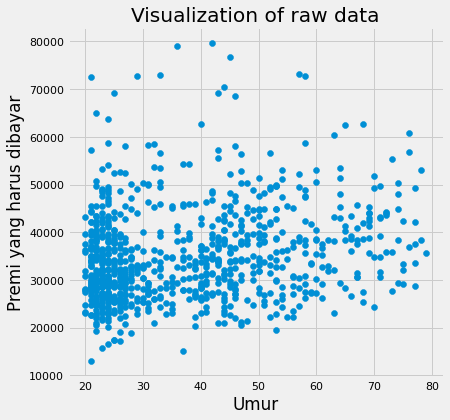

In [29]:
plt.figure(figsize=(6, 6)) #Mengatur ukuran grafik
plt.scatter(df1.iloc[:, 0], df1.iloc[:, 1]) #Mengatur sumbu x dan y
plt.ylabel('Premi yang harus dibayar')
plt.xlabel('Umur')
plt.title('Visualization of raw data')

K-Means

In [48]:
def euclidean_dist(A, B): #Fungsi untuk menghitung euclidean distance
    return metric.euclidean(A, B)

def plot(data, k, index, centroids, orig_centroids): #FUngsi untuk membuat grafik scatter
    
    input = []
    for i in range(len(index)):
        for j in index[i]:
            input.append(int(j))
            
    colors = 10*["g","r","c","b","k"] #Untuk menyiapkan warna

    j=0
    for i in input:
        plt.scatter(data[j,0], data[j,1], marker="o", color=colors[i], s=50, linewidths=5)
        j+=1

    ## Tanda New centroid
    for centroid in range(len(centroids)):
        plt.scatter(centroids[centroid][0],centroids[centroid][1],marker="o", color="k", s=50, linewidths=5)
    
    # Tanda Original centroid
    for centroid in range(len(orig_centroids)):
        plt.scatter(orig_centroids[centroid][0],orig_centroids[centroid][1],marker="D", color="DarkBlue", s=50, linewidths=5)

In [18]:
class K_Means: #Kelas K_Means
    def __init__(self,k,data,centroid_init=None):
        self.k = k
        self.data = data  
        self.centroid_init = centroid_init
        
    def initialise_centroids(self,centroid_init,k,data): #Inisiasi centroid
        
        ## Membuat centroid baru dengan 3 cara (random, firstk, atau langsung ditentukan)
        if(self.centroid_init == 'random'): #inputan random
            initial_centroids = np.random.permutation(data.shape[0])[:self.k]
            self.centroids = data[initial_centroids]
        elif(self.centroid_init == 'firstk'): #inputan 'firstk'
            self.centroids = data[:k]
        else: #ditentukan langsung
            for i in range(self.k): 
                self.centroids.append(i%self.k)
        return self.centroids    
 
    def fit(self,data): #Proses algoritma K-meeans
        m = np.shape(data)[0] #membuat array berdasarkan ukuran
        clusterAssign = np.mat(np.zeros((m,2))) #membuat matrix dengan bentuk m x 2
        
        cents = self.initialise_centroids(self.centroid_init,self.k,data)
        
        # Preserve original centroids
        cents_orig = cents.copy()
        changed = True #variabel kondisi
        num_iter = 0
        
        while changed and num_iter < 100:
            changed = False #variabel kondisi default

            for i in range(m):  # untuk setiap baris pada dataset

                # Track minimum distance and vector index of associated cluster
                min_dist = np.inf #konstanta infinite
                min_index = -1

                #menghitung jarak 
                for j in range(self.k):
                    dist_ji = euclidean_dist(cents[j,:],data[i,:])
                    if(dist_ji < min_dist):
                        min_dist = dist_ji
                        min_index = j
                        
                    # pengecekan cluster sudah berubah atau belum
                    if clusterAssign[i, 0] != min_index: 
                        changed = True

                # Assign instance ke cluster
                clusterAssign[i, :] = min_index, min_dist**2

            # Update lokasi centroid 
            for cent in range(self.k):
                points = data[np.nonzero(clusterAssign[:,0].A==cent)[0]]
                cents[cent,:] = np.mean(points, axis=0)
    
            num_iter += 1

         # Return 
        return cents, clusterAssign, num_iter, cents_orig

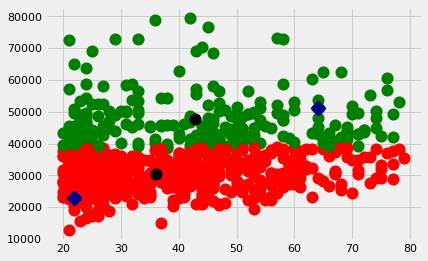

In [19]:
new = df1.to_numpy() #merubah dataframe menjadi array numpy
kmeans = K_Means(k=2, data = new, centroid_init='random') #inisiasi objek
centroids, clusterAssign, iters, FirstCentroid = kmeans.fit(new) #menyimpan hasil fit ke variabel
index = clusterAssign[:,0] # cluster assignment 0,1,.... 
distance = clusterAssign[:,1]  # evaluasi

k=2 #centroid = 2
plot(new,k,index,centroids,FirstCentroid) #membuat grafik

Evaluasi Jumlah K dengan _elbow method_

Text(0, 0.5, 'Dispersion')

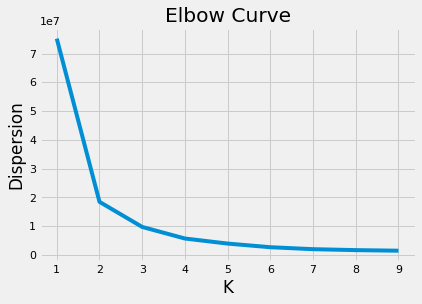

In [20]:
costs = [] #list untuk menyimpan nilai hasil perhitungan
for i in range(10): #dilakukan evaluasi sebanyak k=10
    kmeans = K_Means(k=i, data = new, centroid_init='firstk')
    centroids, clusterAssign, iters, FirstCentroid = kmeans.fit(new)
    distance = clusterAssign[:,1]
    cost = sum(distance)/(2*len(new))
    cost = np.array(cost)
    cost = cost.item()
    costs.append(cost)
    
x = np.arange(10)
plt.plot(x,costs)
plt.title("Elbow Curve")
plt.xlabel("K")
plt.ylabel("Dispersion")